<a href="https://colab.research.google.com/github/Himangi-77/Python_codes/blob/main/Zi_Cloud_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})
import xlrd
%matplotlib inline

In [2]:
wb = xlrd.open_workbook('/content/Zi Cloud Internship Assignment.xlsx', encoding_override='latin1')
df = pd.read_excel(wb)

In [ ]:
df.head()

,First Name,Last Name,Company,Designation,Email,Industry,City,Team,Code,No of Campaign
0,Ashish,Rane,Bike Bazaar,Group CTO,ashish@wheelsemi.com,Two Wheeler life Cycle services,Mumbai,Technology Team,T1,2
1,Ratheesh,Bharathan,Bike Bazaar,Executive VP & Co-founder,ratheesh@wheelsemi.com,Two Wheeler life Cycle services,India,Founding Team,C1,3
2,Srinivas,Kantheti,Bike Bazaar,Co Founder & MD,srini@wheelsemi.com,Two Wheeler life Cycle services,Mumbai,Founding Team,C1,3
3,Rayman,Mathoda,MedGenome,Founder & CEO,rayman@medgenome.com,Genomics Research & Diagnostics,Los Angeles,Founding Team,C1,3
4,Mahesh,Pratapneni,MedGenome,Co-founder & Group CEO,mahesh@medgenome.com,Genomics Research & Diagnostics,Bengaluru,Founding Team,C1,3


The data types are all correct

In [3]:
df.dtypes

First Name        object
Last Name         object
Company           object
Designation       object
Email             object
Industry          object
City              object
Team              object
Code              object
No of Campaign     int64
dtype: object

The length of the data is 649 records but there are 6 null values in Last Name and 1 in City column

In [ ]:
len(df)

649

In [4]:
df.isnull().sum()

First Name        0
Last Name         6
Company           0
Designation       0
Email             0
Industry          0
City              1
Team              0
Code              0
No of Campaign    0
dtype: int64

In [6]:
df[df['Last Name'].isnull()]

,First Name,Last Name,Company,Designation,Email,Industry,City,Team,Code,No of Campaign
27,Anupam,NaN,Klub,Sr TA Associate,anupam@klubworks.com,Fintech,Bengaluru,HR Team,H1,3
65,Deepti,NaN,SAVE Solutions,Sr HR Exec,deepti@saveind.in,BFSI,Delhi,HR Team,H1,3
87,Upasana,NaN,Oasis Fertility,VP HR,upasana@oasisindia.in,Fertility Care,Hyderabad,HR Team,H1,3
162,Satya,NaN,Project Hero,CEO,satya@projecthero.in,Construction Labour Hiring,Bengaluru,Leadership Team,C1,3
250,Ravi,NaN,ApniBus,Co-founder,ravi@apnibus.com,Transport Aggregator,Gurugram,Founding Team,C1,3
612,Deepali,NaN,Bombay Shaving Company,Assistant Manager- Digital Marketing (IB),deepali@bombayshavingcompany.com,Personal Care,Darbhanga,Marketing Team,M1,2


In [7]:
df[df['City'].isnull()]

,First Name,Last Name,Company,Designation,Email,Industry,City,Team,Code,No of Campaign
344,Kritika,Tiwari,goEgoNetwork,Sr HR Manager,kritikat@goegonetwork.com,EV Charging Network,NaN,HR Team,H1,3


Since the null records are small in number we can drop them from the table

In [8]:
df = df.dropna()

Now we are left with 642 records

In [9]:
df.shape

(642, 10)

**EXPLORING UNIQUE VALUES IN EACH ROW**

In [ ]:
columns = df.columns
for i in columns:
  print(f'Number of unique values in {i}: {df[i].nunique()}')

Number of unique values in First Name: 494
Number of unique values in Last Name: 438
Number of unique values in Company: 198
Number of unique values in Designation: 391
Number of unique values in Email: 649
Number of unique values in Industry: 153
Number of unique values in City: 73
Number of unique values in Team: 21
Number of unique values in Code: 12
Number of unique values in No of Campaign: 4


There are people with the same name but they are different individuals belonging to different companies

In [10]:
df[df.duplicated(subset=['First Name','Last Name'],keep=False)]

,First Name,Last Name,Company,Designation,Email,Industry,City,Team,Code,No of Campaign
55,Rajat,Gupta,Mojocare,Founder,rajat@alphacare.xyz,Wellness Solutions,Bengaluru,Founding Team,C1,3
136,Rajat,Gupta,GroMo,Building Gromo,rajat.gupta@gromo.in,Fintech Product Distribution,Gurugram,Leadership Team,C1,3
258,Abhishek,Kumar,HealthAssure,CTO,abhishek.kumar@healthassure.in,Primary Healthcare Network,Gurgaon,Technology Team,T1,2
299,Abhishek,Kumar,MyGate,Co-founder,abhishek@mygate.com,Facility Management,Bengaluru,Founding Team,C1,3


**EXPLORING THE MOST POPULOUS COMPANY, DESIGNATION, INDUSTRY, CITY AND TEAM**

In [12]:
top_company = pd.DataFrame(df['Company'].value_counts()[:20]).reset_index().rename(columns={'index':'Company', 'Company':'Count'})
top_company

,Company,Count
0,Paharpur Cooling Towers,30
1,Toothsi,27
2,Bombay Shaving Company,23
3,Corning,22
4,Jagatjit Industries,14
5,Lionsgate,12
6,Unnati,9
7,PUMA,8
8,CleverTap,7
9,Ralph Lauren,7


Text(0, 0.5, 'Count')

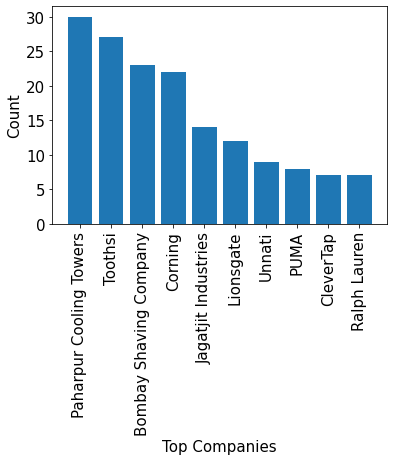

In [15]:
plt.rcParams.update({'font.size':15})
plt.bar(top_company.Company[:10],top_company.Count[:10])
plt.xticks(rotation=90)
plt.xlabel('Top Companies')
plt.ylabel('Count')

In [16]:
top_designation = pd.DataFrame(df['Designation']).value_counts()[:20].reset_index().rename(columns={'index':'Designation',0:'Count'})
top_designation

,Designation,Count
0,Co-founder,44
1,HR Manager,31
2,Founder,15
3,Founder & CEO,14
4,Head HR,13
5,CEO,11
6,Co-founder & CEO,10
7,TA Manager,9
8,CTO,9
9,COO,9


Text(0, 0.5, 'Count')

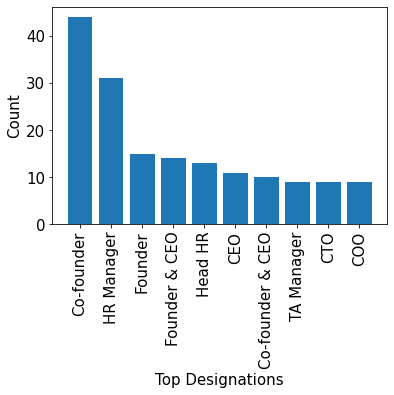

In [17]:
plt.rcParams.update({'font.size':15})
plt.bar(top_designation.Designation[:10],top_designation.Count[:10])
plt.xticks(rotation=90)
plt.xlabel('Top Designations')
plt.ylabel('Count')

In [18]:
top_industry = pd.DataFrame(df['Industry'].value_counts()[:10]).reset_index().rename(columns={'index':'Industry', 'Industry':'Count'})
top_industry

,Industry,Count
0,Cooling Tower,30
1,Luxury Retail,29
2,Dental Tech,27
3,Facility Management,25
4,Personal Care,23
5,Glass,22
6,Alcoholic Beverages,17
7,Entertainment,17
8,Luxury Hospitality,16
9,Apparel & Fashion,14


Text(0, 0.5, 'Count')

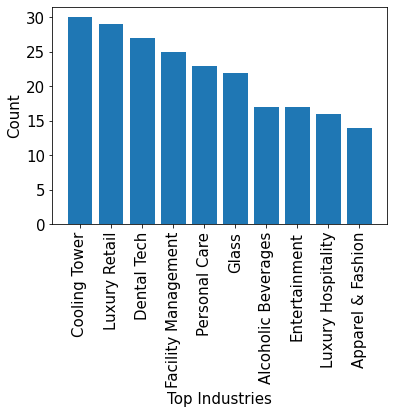

In [19]:
plt.rcParams.update({'font.size':15})
plt.bar(top_industry.Industry,top_industry.Count)
plt.xticks(rotation=90)
plt.xlabel('Top Industries')
plt.ylabel('Count')

In [20]:
top_city = pd.DataFrame(df['City'].value_counts()[:10]).reset_index().rename(columns={'index':'City','City':'Count'})
top_city

,City,Count
0,Mumbai,141
1,Bengaluru,125
2,Delhi,69
3,Gurgaon,37
4,Pune,33
5,New Delhi,27
6,Gurugram,24
7,Noida,19
8,Kolkata,16
9,Hyderabad,15


Text(0, 0.5, 'Count')

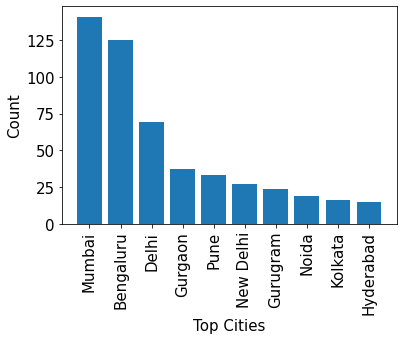

In [21]:
plt.rcParams.update({'font.size':15})
plt.bar(top_city.City, top_city.Count)
plt.xticks(rotation=90)
plt.xlabel('Top Cities')
plt.ylabel('Count')

In [22]:
top_team=pd.DataFrame(df['Team'].value_counts()[:10]).reset_index().rename(columns={'index':'Team','Team':'Count'})
top_team

,Team,Count
0,HR Team,260
1,Founding Team,137
2,Leadership Team,51
3,Marketing Team,41
4,Sales Team,32
5,Technology Team,31
6,Finance Team,18
7,Operations Team,15
8,Procurement Team,14
9,Business Team,12


Text(0, 0.5, 'Count')

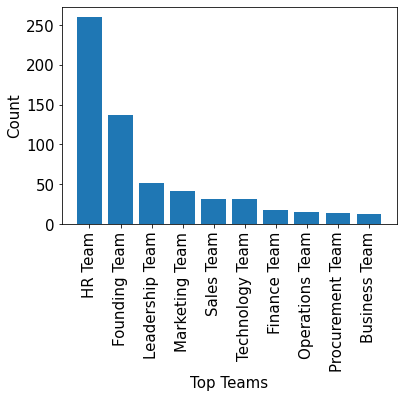

In [24]:
plt.rcParams.update({'font.size':15})
plt.bar(top_team.Team, top_team.Count)
plt.xticks(rotation=90)
plt.xlabel('Top Teams')
plt.ylabel('Count')

In [ ]:
df['Code'].unique()

array(['T1', 'C1', 'H1', 'S1', 'M1', 'CS1', 'F1', 'L1', 'P1', 'AT1',
       'SC1', 'A1'], dtype=object)

**EXPLORING CODES ASSIGNED TO EACH TEAM**

Many teams share the same code

In [25]:
df['Team'].unique()

array(['Technology Team', 'Founding Team', 'HR Team', 'Business Team',
       'Sales Team', 'Operations Team', 'Leadership Team', 'Growth Team',
       'Marketing Team', 'Customer Relations Team', 'Finance Team',
       'Procurement Team', 'Product Team', 'Analytics Team',
       'Digital Team', 'Business team', 'Supply Chain Team', 'Legal Team',
       'Administration Team', 'Logistics Team', 'Commercial Team'],
      dtype=object)

In [35]:
df.groupby(['Team','Code']).size().reset_index().rename(columns={0:'count'}).sort_values(by='Code')

,Team,Code,count
0,Administration Team,A1,1
1,Analytics Team,AT1,1
2,Business Team,C1,12
3,Business team,C1,2
4,Commercial Team,C1,1
6,Digital Team,C1,2
8,Founding Team,C1,137
9,Growth Team,C1,6
15,Operations Team,C1,15
11,Leadership Team,C1,51


**EXPLORING THE NUMBER OF CAMPAIGNS**

Most industries have 3 campaigns out

In [27]:
df['No of Campaign'].value_counts()

3    420
2    122
1     97
4      3
Name: No of Campaign, dtype: int64

Most campaigns cluster in Mumbai, Bangalore and Delhi

In [28]:
a = df.groupby(['City']).aggregate('sum').sort_values(by='No of Campaign',ascending=False).reset_index()[:10]
a

,City,No of Campaign
0,Mumbai,359
1,Bengaluru,319
2,Delhi,176
3,Gurgaon,85
4,Pune,85
5,New Delhi,69
6,Gurugram,63
7,Noida,51
8,Hyderabad,37
9,Kolkata,32


Text(0, 0.5, 'Number of Campaigns')

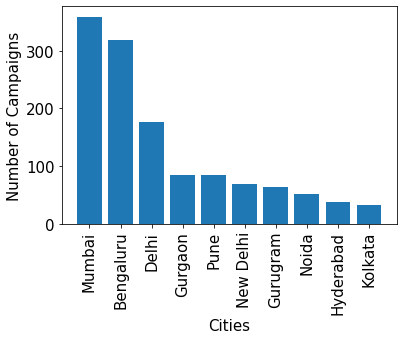

In [36]:
plt.rcParams.update({'font.size':15})
plt.bar(a['City'],a['No of Campaign'])
plt.xticks(rotation=90)
plt.xlabel('Cities')
plt.ylabel('Number of Campaigns')

The company with the most number of campaigns is Toothsi, Bombay Shaving Company and Paharpur Cooling Towers

In [30]:
b = df.groupby(['Company']).aggregate('sum').sort_values(by='No of Campaign',ascending=False).reset_index()[:10]
b

,Company,No of Campaign
0,Toothsi,80
1,Bombay Shaving Company,65
2,Paharpur Cooling Towers,60
3,Corning,52
4,Jagatjit Industries,42
5,Lionsgate,36
6,Unnati,27
7,PUMA,24
8,Ralph Lauren,22
9,Biryani By Kilo,21


Text(0, 0.5, 'Number of Campaigns')

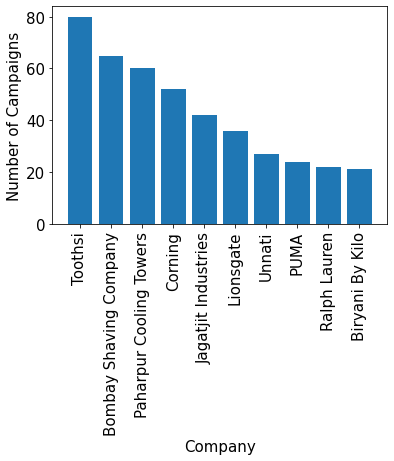

In [37]:
plt.rcParams.update({'font.size':15})
plt.bar(b['Company'],b['No of Campaign'])
plt.xticks(rotation=90)
plt.xlabel('Company')
plt.ylabel('Number of Campaigns')

The industry with the most number of campaigns is Luxury Retail, Dental Tech and Facility Management

In [31]:
c = df.groupby(['Industry']).aggregate('sum').sort_values(by='No of Campaign',ascending=False).reset_index()[:10]
c

,Industry,No of Campaign
0,Luxury Retail,80
1,Dental Tech,80
2,Facility Management,75
3,Personal Care,65
4,Cooling Tower,60
5,Glass,52
6,Alcoholic Beverages,51
7,Entertainment,46
8,Luxury Hospitality,40
9,Apparel & Fashion,38


Text(0, 0.5, 'Number of Campaigns')

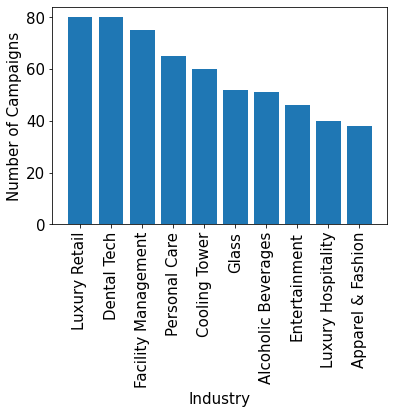

In [39]:
plt.rcParams.update({'font.size':15})
plt.bar(c['Industry'],c['No of Campaign'])
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Number of Campaigns')

In [34]:
d = df.groupby(['Company','Industry','City']).aggregate('sum').sort_values(by='No of Campaign',ascending=False).reset_index()[:10]
d

,Company,Industry,City,No of Campaign
0,Toothsi,Dental Tech,Mumbai,62
1,Lionsgate,Entertainment,Mumbai,33
2,Paharpur Cooling Towers,Cooling Tower,Kolkata,28
3,Ralph Lauren,Luxury Retail,Bengaluru,22
4,PUMA,Apparel & Fashion,Bengaluru,21
5,Bombay Shaving Company,Personal Care,Delhi,20
6,Bombay Shaving Company,Personal Care,New Delhi,18
7,CashFlo,Supply Chain Finance,Mumbai,16
8,Bombay Shaving Company,Personal Care,Gurugram,16
9,Jodo,Fee Payment Solutions,Bengaluru,15


**OVERALL INSIGHT**

1. DATA PREPROCESSING reveals that the table initially has 649 records, of which there are **7 null values**
2. 6 null values belong to last name and 1 belongs to the city column
3. After dropping the null values (since it's proportion is less), we are left with 642 records and 10 attributes
4. Then we explored the unique values in each column.
5. We found out the most populous company, industry, city, designation and teams in the data
6. Then we explored the codes assigned to each team and found that although there are only 12 codes, there are a total of 21 teams. Thus, **several teams share the same code** such as Growth Team, Founding Team, Leadership Team, Digital Team, etc.. 
7. Then we explored the number of campaigns and found that **most industries have put out 3 campaigns**
8. **The most number of campaigns are put out in metro cities - probably for commercial purposes.** 
9. The top 3 companies with the most number of campaigns are **Toothsi, Bombay Shaving Company and Paharpur Cooling Towers**
10. The top 3 industries with the most number of campaigns are **Luxury Retail, Dental Tech and Facility Management**
11. We can also see from the final table that the most populous industries and companies belong in metro cities - which is probably why they have the most number of campaigns